In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity

#### Data Loading and Merging

In [2]:
basic_info = pd.read_excel(r"C:\Users\hp\Downloads\Entertainer Data\Entertainer Data Analysis\Entertainer - Basic Info.xlsx")
breakthrough_info = pd.read_excel(r"C:\Users\hp\Downloads\Entertainer Data\Entertainer Data Analysis\Entertainer - Breakthrough Info.xlsx")
last_work_info = pd.read_excel(r"C:\Users\hp\Downloads\Entertainer Data\Entertainer Data Analysis\Entertainer - Last work Info.xlsx")

merged_data = pd.merge(basic_info, breakthrough_info, on='Entertainer', how='inner')
merged_data = pd.merge(merged_data, last_work_info, on='Entertainer', how='inner')

In [3]:
merged_data

,Entertainer,Gender (traditional),Birth Year,Year of Breakthrough/#1 Hit/Award Nomination,Breakthrough Name,Year of First Oscar/Grammy/Emmy,Year of Last Major Work (arguable),Year of Death
0,Adele,F,1988,2008,19,2009.0,2016,NaN
1,Angelina Jolie,F,1975,1999,"Girl, Interrupted",1999.0,2016,NaN
2,Aretha Franklin,F,1942,1967,I Never Loved a Man (The Way I Love You),1968.0,2014,NaN
3,Bette Davis,F,1908,1934,Of Human Bondage,1935.0,1989,1989.0
4,Betty White,F,1922,1952,Life with Elilzabeth,1976.0,2016,NaN
...,...,...,...,...,...,...,...,...
65,Tom Hanks,M,1956,1984,Splash,1993.0,2016,NaN
66,Tony Bennett,M,1926,1951,Because of You,1963.0,2016,NaN
67,Wayne Newton,M,1942,1972,"Daddy, Don't You Walk So Fast",NaN,2016,NaN
68,Will Smith,M,1968,1990,The Fresh Prince of Bel-Air,1988.0,2016,NaN


#### Handling Missing Values and Data Visualization 

In [4]:
merged_data['Year of Death'].fillna(0, inplace=True)
merged_data['Year of First Oscar/Grammy/Emmy'].fillna(0, inplace=True)

In [5]:
merged_data

,Entertainer,Gender (traditional),Birth Year,Year of Breakthrough/#1 Hit/Award Nomination,Breakthrough Name,Year of First Oscar/Grammy/Emmy,Year of Last Major Work (arguable),Year of Death
0,Adele,F,1988,2008,19,2009.0,2016,0.0
1,Angelina Jolie,F,1975,1999,"Girl, Interrupted",1999.0,2016,0.0
2,Aretha Franklin,F,1942,1967,I Never Loved a Man (The Way I Love You),1968.0,2014,0.0
3,Bette Davis,F,1908,1934,Of Human Bondage,1935.0,1989,1989.0
4,Betty White,F,1922,1952,Life with Elilzabeth,1976.0,2016,0.0
...,...,...,...,...,...,...,...,...
65,Tom Hanks,M,1956,1984,Splash,1993.0,2016,0.0
66,Tony Bennett,M,1926,1951,Because of You,1963.0,2016,0.0
67,Wayne Newton,M,1942,1972,"Daddy, Don't You Walk So Fast",0.0,2016,0.0
68,Will Smith,M,1968,1990,The Fresh Prince of Bel-Air,1988.0,2016,0.0


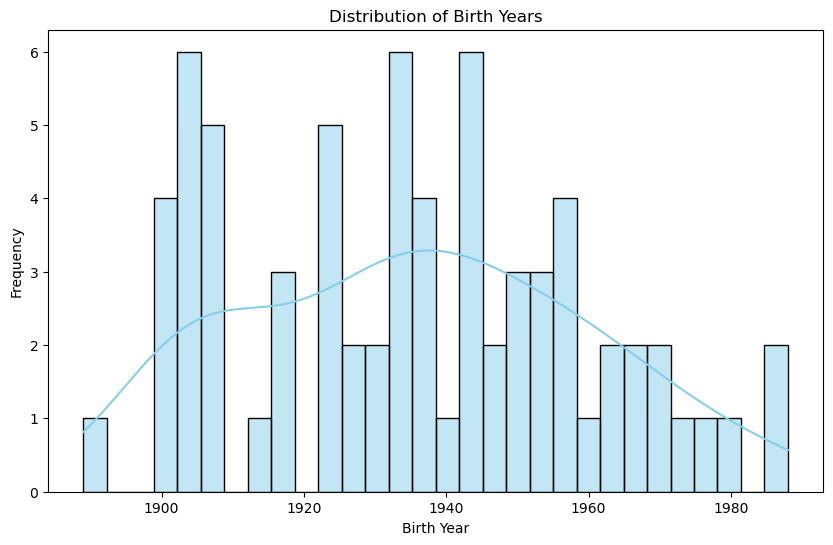

In [6]:
# Distribution of Birth Years
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_data, x='Birth Year', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Birth Years')
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.show()

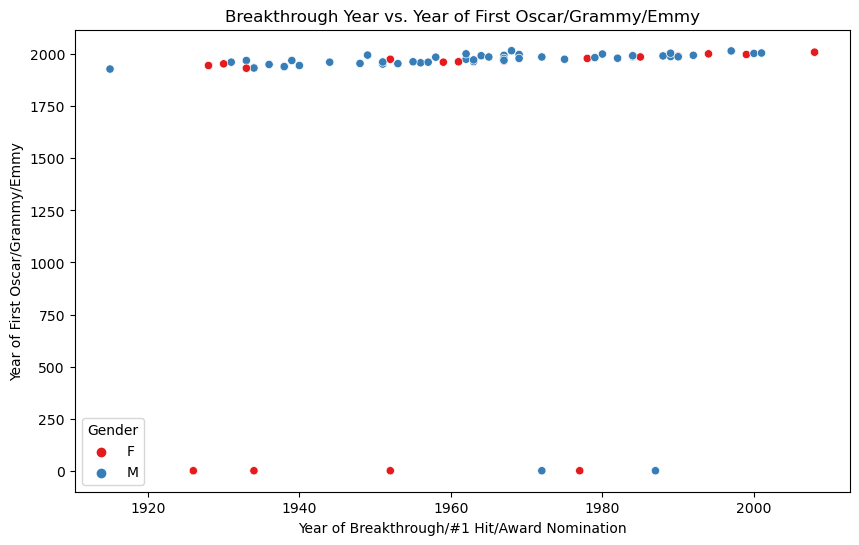

In [7]:
# Scatter plot of Breakthrough Year vs. Year of First Oscar/Grammy/Emmy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='Year of Breakthrough/#1 Hit/Award Nomination', y='Year of First Oscar/Grammy/Emmy', hue='Gender (traditional)', palette='Set1')
plt.title('Breakthrough Year vs. Year of First Oscar/Grammy/Emmy')
plt.xlabel('Year of Breakthrough/#1 Hit/Award Nomination')
plt.ylabel('Year of First Oscar/Grammy/Emmy')
plt.legend(title='Gender')
plt.show()


#### User-Item Matrix Creation 

In [8]:
# Creating a user-item matrix
user_item_matrix = merged_data.drop(['Entertainer'], axis=1)  # Drop the 'Entertainer' column for matrix creation

In [9]:
user_item_matrix

,Gender (traditional),Birth Year,Year of Breakthrough/#1 Hit/Award Nomination,Breakthrough Name,Year of First Oscar/Grammy/Emmy,Year of Last Major Work (arguable),Year of Death
0,F,1988,2008,19,2009.0,2016,0.0
1,F,1975,1999,"Girl, Interrupted",1999.0,2016,0.0
2,F,1942,1967,I Never Loved a Man (The Way I Love You),1968.0,2014,0.0
3,F,1908,1934,Of Human Bondage,1935.0,1989,1989.0
4,F,1922,1952,Life with Elilzabeth,1976.0,2016,0.0
...,...,...,...,...,...,...,...
65,M,1956,1984,Splash,1993.0,2016,0.0
66,M,1926,1951,Because of You,1963.0,2016,0.0
67,M,1942,1972,"Daddy, Don't You Walk So Fast",0.0,2016,0.0
68,M,1968,1990,The Fresh Prince of Bel-Air,1988.0,2016,0.0


#### User-User Similarity Heatmap

In [10]:
train_data, test_data = train_test_split(user_item_matrix, test_size=0.2, random_state=42)
numeric_columns = user_item_matrix.select_dtypes(include=['float64', 'int64']).columns
train_data_numeric = train_data[numeric_columns]

user_similarity = cosine_similarity(train_data_numeric)

In [11]:
user_similarity

array([[1.        , 0.89377446, 0.89083347, ..., 0.89155736, 0.99999304,
        0.89015195],
       [0.89377446, 1.        , 0.99992908, ..., 0.99996594, 0.89380206,
        0.99991851],
       [0.89083347, 0.99992908, 1.        , ..., 0.9999815 , 0.89082963,
        0.99998224],
       ...,
       [0.89155736, 0.99996594, 0.9999815 , ..., 1.        , 0.89156287,
        0.99998932],
       [0.99999304, 0.89380206, 0.89082963, ..., 0.89156287, 1.        ,
        0.890148  ],
       [0.89015195, 0.99991851, 0.99998224, ..., 0.99998932, 0.890148  ,
        1.        ]])

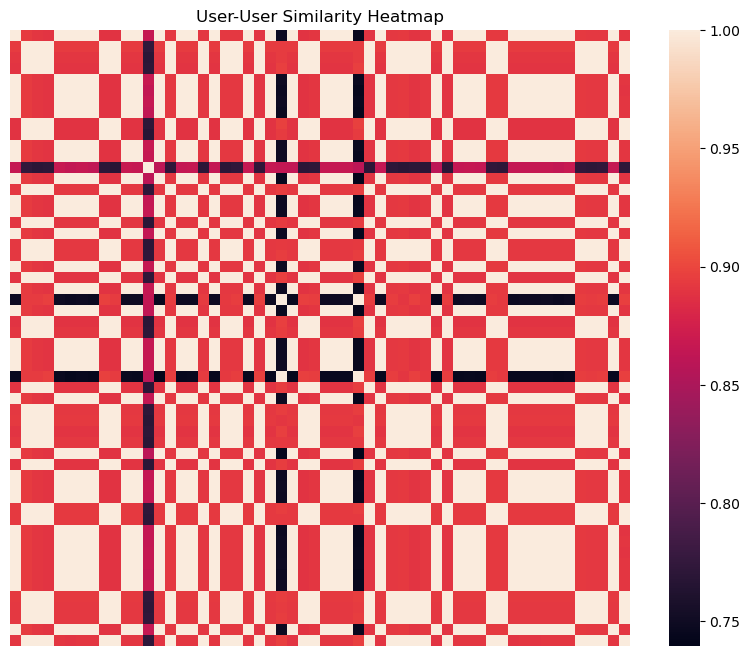

In [12]:
# Heatmap of User-User Similarity
plt.figure(figsize=(10, 8))
sns.heatmap(user_similarity, cmap='rocket', xticklabels=False, yticklabels=False)
plt.title('User-User Similarity Heatmap')
plt.show()

#### Radar Chart of Entertainer Attributes 

Enter the name of the entertainer:Angelina Jolie


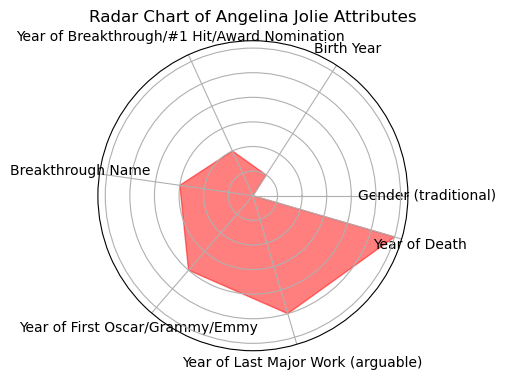

In [13]:
from math import pi

user_id = input("Enter the name of the entertainer:")

# Radar Chart of Entertainer Attributes
attributes = merged_data.columns[1:]
theta = list(range(len(attributes)))
values = merged_data.loc[merged_data['Entertainer'] == user_id, attributes].values.flatten().tolist()
plt.figure(figsize=(4, 6))
ax = plt.subplot(111, polar=True)
ax.fill(theta, values, color='red', alpha=0.50)
ax.set_yticklabels([])
ax.set_thetagrids([t * 180/pi for t in theta], attributes)
plt.title(f'Radar Chart of {user_id} Attributes')
plt.show()

#### Decision Tree Model 

In [14]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, plot_tree

imputer = SimpleImputer(strategy='mean')
train_data_numeric_imputed = imputer.fit_transform(train_data_numeric)
test_data_numeric_imputed = imputer.transform(test_data[numeric_columns])

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(train_data_numeric_imputed, train_data['Year of Last Major Work (arguable)'])
predictions = dt_model.predict(test_data_numeric_imputed)
mse = mean_squared_error(test_data['Year of Last Major Work (arguable)'], predictions)
print(f"Decision Tree MSE: {mse}")

Decision Tree MSE: 5.785714285714286


#### Entertainer Recommendation System (Collaborative Filtering) 

In [15]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_entertainers():
    train_data = merged_data.copy()
    entertainer_column = 'Entertainer'

    user_id = input("Enter the user ID: ")

    if user_id in train_data[entertainer_column].values:
        print(f"User {user_id} found in the dataset.")

        user_ratings = train_data.loc[train_data[entertainer_column] == user_id, :]
        numeric_columns = user_ratings.select_dtypes(include=['float64', 'int64']).columns
        train_data_numeric = train_data[numeric_columns]
        user_similarity = cosine_similarity(train_data_numeric)
        similar_users_idx = user_similarity[user_ratings.index.values[0]].argsort()[::-1][1:]
        similar_entertainers = train_data.loc[similar_users_idx, entertainer_column].tolist()
        num_recommendations = int(input("Enter the number of recommendations: "))
        print(f"\nTop {num_recommendations} Recommended Entertainers for {user_id}:")

        for i, entertainer in enumerate(similar_entertainers[:num_recommendations], 1):
            print(f"{i}. {entertainer}")

        return similar_entertainers[:num_recommendations]
    else:
        print(f"\nUser {user_id} not found in the dataset.")
        return []
recommendations = recommend_entertainers()

Enter the user ID: Angelina Jolie
User Angelina Jolie found in the dataset.
Enter the number of recommendations: 8

Top 8 Recommended Entertainers for Angelina Jolie:
1. Justin Timberlake
2. Mariah Carey
3. Jennifer Aniston
4. Will Smith
5. Lady Gaga
6. Adele
7. Keifer Sutherland
8. Madonna


#### Interactive Entertainer Profiles 

In [16]:
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
train_data = merged_data.copy()

entertainer_column = 'Entertainer'
heading = widgets.HTML(value="<h2 style='color: #3498db; text-align: center;'>Entertainer Profiles</h2>")
letter_dropdown = widgets.Dropdown(options=[chr(i) for i in range(ord('A'), ord('Z') + 1)], description='Select Letter:')
exit_button = widgets.Button(description='Exit Program', button_style='danger')
output_entertainer_grid = widgets.Output()
def display_entertainer_grid(letter):
    with output_entertainer_grid:
        clear_output(wait=True)
        filtered_data = train_data[train_data[entertainer_column].str.startswith(letter)]

        if not filtered_data.empty:
            entertainer_buttons = [widgets.Button(description=name, button_style='info', layout=widgets.Layout(width='200px')) for name in filtered_data[entertainer_column].tolist()]
            for button in entertainer_buttons:
                button.on_click(lambda b, entertainer_name=button.description: display_entertainer_profile(entertainer_name))

            display(widgets.HBox(entertainer_buttons))
        else:
            print(f"No entertainers found with the selected letter: {letter}")

def display_entertainer_profile(entertainer_name):
    with output_entertainer_grid:
        clear_output(wait=True)
        entertainer_data = train_data[train_data[entertainer_column] == entertainer_name].iloc[0]
        display_entertainer_details(entertainer_data)
def display_entertainer_details(entertainer_data):
    print(f"Entertainer Profile: {entertainer_data[entertainer_column]}")
    for i, (attribute, value) in enumerate(entertainer_data.items(), 1):
        if attribute != entertainer_column:
            print(f"{i}. {attribute}: {value}")
def on_exit_button_click(b):
    with output_entertainer_grid:
        clear_output(wait=True)
        print("Exited.")

widgets.interactive(display_entertainer_grid, letter=letter_dropdown)
exit_button.on_click(on_exit_button_click)
input_widgets = widgets.VBox([heading, letter_dropdown, exit_button])
output_widgets = widgets.VBox([output_entertainer_grid])
display(widgets.VBox([input_widgets, output_widgets]))